# opencv基本操作

* cv2.IMREAD_COLOR: 彩色图像
* cv2.IMREAD_GRAYSCALE: 灰色图像

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

img = cv2.imread('flower.jpg')

In [2]:
img

array([[[ 50,  67,  58],
        [ 41,  58,  49],
        [ 41,  58,  49],
        ...,
        [ 61,  52,  43],
        [ 61,  54,  45],
        [ 54,  45,  41]],

       [[ 53,  70,  61],
        [ 50,  67,  58],
        [ 50,  67,  58],
        ...,
        [ 56,  47,  38],
        [ 52,  45,  36],
        [ 37,  28,  24]],

       [[ 48,  65,  56],
        [ 50,  67,  58],
        [ 49,  66,  57],
        ...,
        [ 32,  23,  14],
        [ 32,  25,  16],
        [ 38,  29,  25]],

       ...,

       [[ 47,  98,  90],
        [ 47,  98,  90],
        [ 49, 101,  91],
        ...,
        [  4,  10,   5],
        [  8,  14,   9],
        [ 10,  16,  11]],

       [[ 46,  96,  86],
        [ 47,  99,  89],
        [ 47,  99,  89],
        ...,
        [ 10,  13,  11],
        [  8,  11,   9],
        [  8,  11,   9]],

       [[ 46,  96,  86],
        [ 49,  99,  89],
        [ 47,  99,  89],
        ...,
        [  9,  12,  10],
        [  6,   9,   7],
        [  5,   8,   6]]

In [43]:
def cv_show(img):
    cv2.imshow('image',img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [4]:
img.shape

(3378, 2873, 3)

In [51]:
img = cv2.imread('flower.jpg',cv2.IMREAD_COLOR)
img

array([[[ 50,  67,  58],
        [ 41,  58,  49],
        [ 41,  58,  49],
        ...,
        [ 61,  52,  43],
        [ 61,  54,  45],
        [ 54,  45,  41]],

       [[ 53,  70,  61],
        [ 50,  67,  58],
        [ 50,  67,  58],
        ...,
        [ 56,  47,  38],
        [ 52,  45,  36],
        [ 37,  28,  24]],

       [[ 48,  65,  56],
        [ 50,  67,  58],
        [ 49,  66,  57],
        ...,
        [ 32,  23,  14],
        [ 32,  25,  16],
        [ 38,  29,  25]],

       ...,

       [[ 47,  98,  90],
        [ 47,  98,  90],
        [ 49, 101,  91],
        ...,
        [  4,  10,   5],
        [  8,  14,   9],
        [ 10,  16,  11]],

       [[ 46,  96,  86],
        [ 47,  99,  89],
        [ 47,  99,  89],
        ...,
        [ 10,  13,  11],
        [  8,  11,   9],
        [  8,  11,   9]],

       [[ 46,  96,  86],
        [ 49,  99,  89],
        [ 47,  99,  89],
        ...,
        [  9,  12,  10],
        [  6,   9,   7],
        [  5,   8,   6]]

In [ ]:
cv2.imwrite('grayflower.png',img)

In [6]:
img.size

9704994

In [7]:
img.dtype

dtype('uint8')

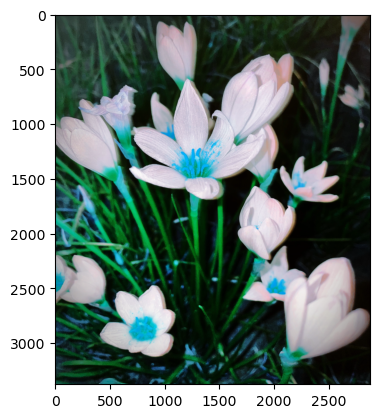

In [52]:
plt.imshow(img)

## 数据读取-视频
* cv2.VideoCapture可以捕获摄像头，用数字来控制不同的设备，例如0，1
* 如果时视频文件，直接指定路径即可


In [8]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
vc=cv2.VideoCapture('skate.mov')

In [3]:
# 检查是否打开
if vc.isOpened():
    open, frame = vc.read()
else:
    open = False

In [4]:
while open:
    ret, frame = vc.read()
    if frame is None:
        break
    if ret == True:
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        cv2.imshow('result', gray)
        if cv2.waitKey(100) & 0xFF == 27:
            break
vc.release()
cv2.destoryAllWindows()

AttributeError: module 'cv2' has no attribute 'destoryAllWindows'

## 截取部分图像数据

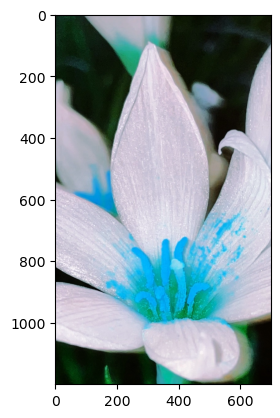

In [24]:
img = cv2.imread('flower.jpg',cv2.IMREAD_COLOR)
flower = img[500:1700, 900:1600]
plt.imshow(flower)

## 颜色通道提取

In [26]:
b,g,r=cv2.split(img)

In [27]:
b

array([[50, 41, 41, ..., 61, 61, 54],
       [53, 50, 50, ..., 56, 52, 37],
       [48, 50, 49, ..., 32, 32, 38],
       ...,
       [47, 47, 49, ...,  4,  8, 10],
       [46, 47, 47, ..., 10,  8,  8],
       [46, 49, 47, ...,  9,  6,  5]], dtype=uint8)

In [28]:
b.shape

(3378, 2873)

In [29]:
img=cv2.merge((b,g,r))
img.shape

(3378, 2873, 3)

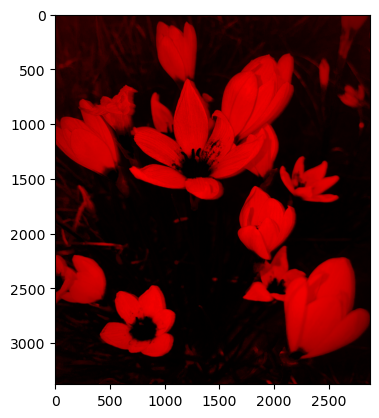

In [42]:
# 只保留R
cur_img = img.copy()
cur_img[:,:,1] = 0
cur_img[:,:,2] = 0
plt.imshow(cur_img)

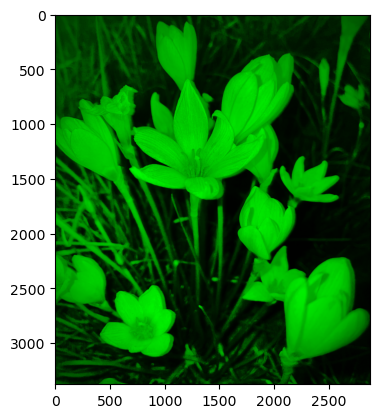

In [37]:
# 只保留G
cur_img = img.copy()
cur_img[:,:,0] = 0
cur_img[:,:,2] = 0
plt.imshow(cur_img)

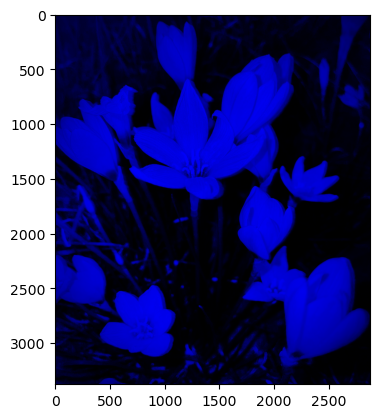

In [44]:
# 只保留B
cur_img = img.copy()
cur_img[:,:,0] = 0
cur_img[:,:,1] = 0
plt.imshow(cur_img)

## 边界填充

cv.copyMakeBorder(img,top, bottom, left, right ,borderType)

img：需要填充的图像；

* top：图像上边界需要填充的像素点；
* bottom：图像下边界需要填充的像素点；
* left：图像左边界需要填充的像素点；
* right：图像右边界需要填充的像素点；
* borderType：图像填充的方法。

In [48]:
top_size, bottom_size, left_size, right_size = (100,100,100,100)

replicate = cv2.copyMakeBorder(img, top_size, bottom_size, left_size, right_size, borderType=cv2.BORDER_REPLICATE)
reflect = cv2.copyMakeBorder(img, top_size, bottom_size, left_size, right_size, cv2.BORDER_REFLECT)
reflect101 = cv2.copyMakeBorder(img, top_size, bottom_size, left_size, right_size, cv2.BORDER_REFLECT_101)
wrap = cv2.copyMakeBorder(img, top_size, bottom_size, left_size, right_size, cv2.BORDER_WRAP)
constant = cv2.copyMakeBorder(img, top_size, bottom_size, left_size, right_size, cv2.BORDER_CONSTANT, value=0)


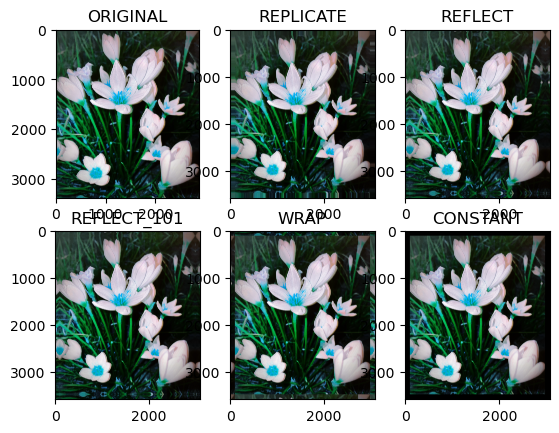

In [50]:
plt.subplot(231), plt.imshow(img, 'gray'), plt.title('ORIGINAL')
plt.subplot(232), plt.imshow(replicate, 'gray'), plt.title('REPLICATE')
plt.subplot(233), plt.imshow(reflect, 'gray'), plt.title('REFLECT')
plt.subplot(234), plt.imshow(reflect101, 'gray'), plt.title('REFLECT_101')
plt.subplot(235), plt.imshow(wrap, 'gray'), plt.title('WRAP')
plt.subplot(236), plt.imshow(constant, 'gray'), plt.title('CONSTANT')

plt.show()
cv2.waitKey(0)
cv2.destroyAllWindows()

* BORDER_REPLICATE：复制法，也就是复制最边缘像素。
* BORDER_REFLECT：反射法，对感兴趣的图像中的像素在两边进行复制例如：fedcba|abcdefgh|hgfedcb
* BORDER_REFLECT_101：反射法，也就是以最边缘像素为轴，对称，gfedcb|abcdefgh|gfedcba
* BORDER_WRAP：外包装法abcdefgh|abcdefgh|abcdefg
* BORDER_CONSTANT：常量法，常数值填充,需要在设置一个value值，已显示填充的颜色

In [ ]:
### 数值计算

In [94]:
img_fl = cv2.imread('flower.jpg',cv2.IMREAD_COLOR)
img_sc = cv2.imread('school.jpg',cv2.IMREAD_COLOR)

In [95]:
img_fl2 = img_fl + 10
img_fl[:5,:,0]

array([[50, 41, 41, ..., 61, 61, 54],
       [53, 50, 50, ..., 56, 52, 37],
       [48, 50, 49, ..., 32, 32, 38],
       [44, 49, 48, ..., 42, 30, 42],
       [49, 54, 55, ..., 31, 35, 36]], dtype=uint8)

In [96]:
img_fl2[:5,:,0]

array([[60, 51, 51, ..., 71, 71, 64],
       [63, 60, 60, ..., 66, 62, 47],
       [58, 60, 59, ..., 42, 42, 48],
       [54, 59, 58, ..., 52, 40, 52],
       [59, 64, 65, ..., 41, 45, 46]], dtype=uint8)

In [97]:
(img_fl + img_fl2)[:5,:,0]

array([[110,  92,  92, ..., 132, 132, 118],
       [116, 110, 110, ..., 122, 114,  84],
       [106, 110, 108, ...,  74,  74,  86],
       [ 98, 108, 106, ...,  94,  70,  94],
       [108, 118, 120, ...,  72,  80,  82]], dtype=uint8)

超出255的值从0开始加

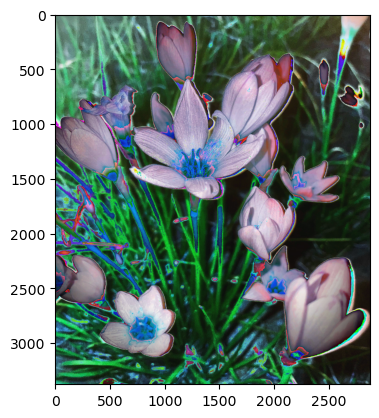

In [98]:
plt.imshow(img_fl + img_fl2)

In [99]:
cv2.add(img_fl, img_fl2)[:5,:,0]

array([[110,  92,  92, ..., 132, 132, 118],
       [116, 110, 110, ..., 122, 114,  84],
       [106, 110, 108, ...,  74,  74,  86],
       [ 98, 108, 106, ...,  94,  70,  94],
       [108, 118, 120, ...,  72,  80,  82]], dtype=uint8)

超出255的部分则为255

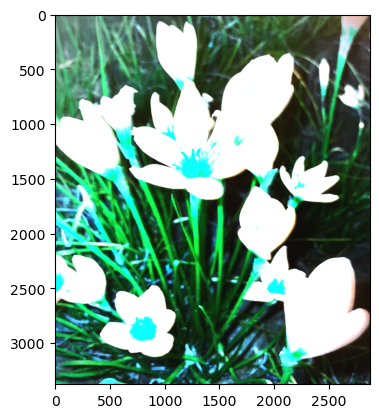

In [100]:
plt.imshow(cv2.add(img_fl, img_fl2))

## 图像融合

In [101]:
img_fl + img_sc #报错

ValueError: operands could not be broadcast together with shapes (3378,2873,3) (1280,1920,3) 

In [105]:
print(img_fl.shape)
print(img_sc.shape)

(3378, 2873, 3)
(1280, 1920, 3)


 **两图直接融合会报错，我们需要将两图调整到大小相同**

In [122]:
img_sc = cv2.resize(img_sc,(1920, 1280))
img_fl = cv2.resize(img_fl,(1920, 1280))
print(img_fl.shape)
print(img_sc.shape)

(1280, 1920, 3)
(1280, 1920, 3)


In [194]:
res = cv2.addWeighted(img_fl, 0.2, img_sc, 0.8, 1)

True

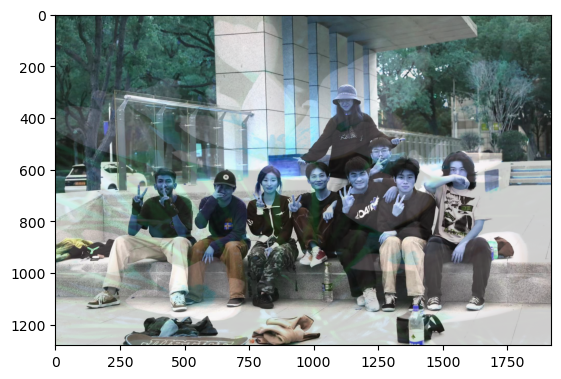

In [195]:
plt.imshow(res)
cv2.imwrite('flandsc.png', res)

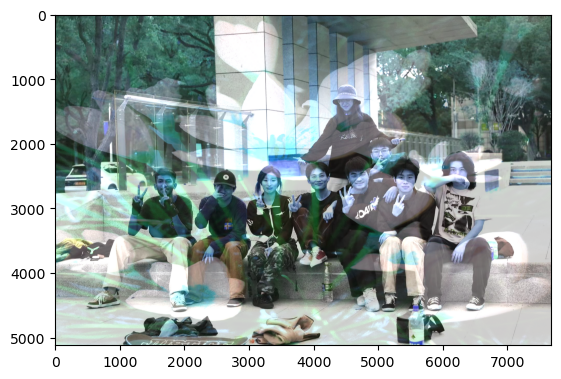

In [131]:
res = cv2.resize(img, (0,0), fx=4, fy=4)
plt.imshow(res)

# 形态学操作

## 形态学-腐蚀操作

形态学转换主要针对的是二值图像（0或1）。 图像腐蚀类似于“领域被蚕食”，将图像中的高亮区域或白色部分进行缩减细化，其运行结果图比原图的高亮区域更小。

图像腐蚀主要使用erode函数

dst = cv2.erode(src, kernel, iterations)

参数：
* dst表示处理的结果，
* src表示原图像，kernel表示卷积核，
* iterations表示迭代次数。
注意：迭代次数默认是1，表示进行一次腐蚀，也可以根据需要进行多次迭代，进行多次腐蚀。

In [200]:
#原图
img = cv2.imread('test.png')
                     
cv2.imshow('img',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [215]:
#腐蚀后
img = cv2.imread('test.png')
kernel = np.ones((5,5), np.uint8)
erosion = cv2.erode(img,kernel,iterations=1)                  
cv2.imshow('erosion',erosion)
cv2.waitKey(0)
cv2.destroyAllWindows()

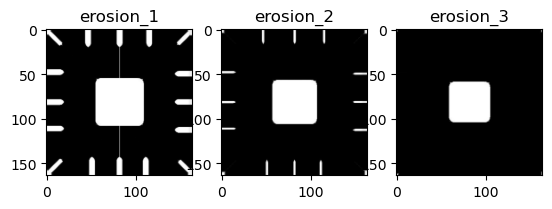

In [212]:


kernel = np.ones((5,5), np.uint8)
erosion_1 = cv2.erode(img,kernel,iterations=1)
erosion_2 = cv2.erode(img,kernel,iterations=2)
erosion_3 = cv2.erode(img,kernel,iterations=3)
res = np.hstack((erosion_1,erosion_2,erosion_3))

plt.subplot(231), plt.imshow(erosion_1, 'gray'), plt.title('erosion_1')
plt.subplot(232), plt.imshow(erosion_2, 'gray'), plt.title('erosion_2')
plt.subplot(233), plt.imshow(erosion_3, 'gray'), plt.title('erosion_3')

plt.show()
cv2.waitKey(0)
cv2.destroyAllWindows()

## 形态学-膨胀

理论基础

图像膨胀是腐蚀操作的逆操作，类似于“领域扩张”，将图像中的高亮区域或白色部分进行扩张，其运行结果图比原图的高亮区域更大，线条变粗了，主要用于去噪。

(1) 图像被腐蚀后，去除了噪声，但是会压缩图像。

(2) 对腐蚀过的图像，进行膨胀处理，可以去除噪声，并且保持原有形状。


图像膨胀主要使用dilate函数，其原型如下：

dst = cv2.dilate(src, kernel, iterations)
参数：
* dst表示处理的结果，
* src表示原图像，
* kernel表示卷积核，
* iterations表示迭代次数。

注意：迭代次数默认是1，表示进行一次膨胀，也可以根据需要进行多次迭代，进行多次膨胀。通常进行1次膨胀即可。


In [216]:
#膨胀后
img = cv2.imread('test.png')
kernel = np.ones((5,5), np.uint8)
dige_dilate = cv2.dilate(img,kernel,iterations=1)
                     
cv2.imshow('dige_dilate',dige_dilate)
cv2.waitKey(0)
cv2.destroyAllWindows()

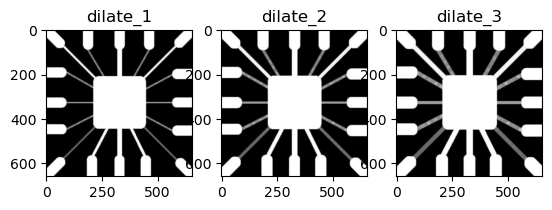

In [218]:
img = cv2.imread('test.png')
kernel = np.ones((5,5), np.uint8)
#膨胀操作
dilate_1 = cv2.dilate(img,kernel,iterations=1)
dilate_2 = cv2.dilate(img,kernel,iterations=2)
dilate_3 = cv2.dilate(img,kernel,iterations=3)
plt.subplot(234), plt.imshow(dilate_1, 'gray'), plt.title('dilate_1')
plt.subplot(235), plt.imshow(dilate_2, 'gray'), plt.title('dilate_2')
plt.subplot(236), plt.imshow(dilate_3, 'gray'), plt.title('dilate_3')
plt.show()
cv2.waitKey(0)
cv2.destroyAllWindows()

#### 先对图像进行腐蚀再进行膨胀：

In [49]:
img_ep = cv2.imread('girl.jpg')
kernel = np.ones((5,5), np.uint8)

height, width = img_ep.shape[:2]
img_ep = cv2.resize(img_ep, (int(width/2), int(height/2)))

#腐蚀操作
erosion_1 = cv2.erode(img_ep,kernel,iterations=1)
erosion_2 = cv2.erode(img_ep,kernel,iterations=2)
erosion_3 = cv2.erode(img_ep,kernel,iterations=3)
#膨胀操作
dilate_1 = cv2.dilate(erosion_1,kernel,iterations=1)
dilate_2 = cv2.dilate(erosion_2,kernel,iterations=2)
dilate_3 = cv2.dilate(erosion_3,kernel,iterations=3)

#并列展示
ero_res = np.hstack((erosion_1,erosion_2,erosion_3))
dil_res = np.hstack((dilate_1,dilate_2,dilate_3))
res = np.vstack((ero_res,dil_res))

# plt.subplot(231), plt.imshow(erosion_1, 'gray'), plt.title('erosion_1')
# plt.subplot(232), plt.imshow(erosion_2, 'gray'), plt.title('erosion_2')
# plt.subplot(233), plt.imshow(erosion_3, 'gray'), plt.title('erosion_3')
# plt.subplot(234), plt.imshow(dilate_1, 'gray'), plt.title('dilate_1')
# plt.subplot(235), plt.imshow(dilate_2, 'gray'), plt.title('dilate_2')
# plt.subplot(236), plt.imshow(dilate_3, 'gray'), plt.title('dilate_3')

# plt.show()
cv2.imshow('ero',res)
cv2.waitKey(0)
cv2.destroyAllWindows()



## 开运算与闭运算

In [13]:
# 开：先腐蚀，再膨胀
img = cv2.imread("test.png")
kernel = np.ones((5,5), np.uint8)
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)

cv2.imwrite('flower1.jpg', opening)
# plt.imshow(opening)

True

In [14]:
# 闭：先膨胀，再腐蚀
img = cv2.imread("test.png")
kernel = np.ones((5,5), np.uint8)
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)

cv2.imwrite('flower2.jpg', closing)
# plt.imshow(closing)

True

## 梯度运算

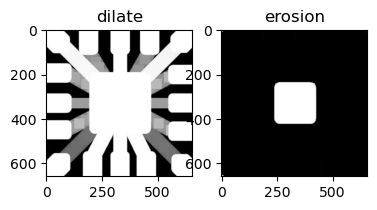

In [2]:
# 梯度 = 膨胀 - 腐蚀
test = cv2.imread('test.png')
kernel = np.ones((10,10), np.uint8)
dilate = cv2.dilate(test,kernel,iterations = 5)
erosion = cv2.erode(test,kernel,iterations = 5)

plt.subplot(234), plt.imshow(dilate, 'gray'), plt.title('dilate')
plt.subplot(235), plt.imshow(erosion, 'gray'), plt.title('erosion')
plt.show()
cv2.waitKey(0)
cv2.destroyAllWindows()

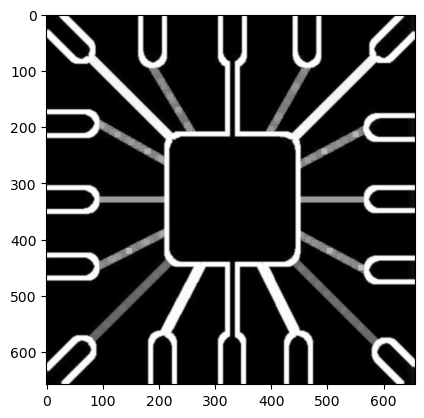

In [20]:
gradient = cv2.morphologyEx(test, cv2.MORPH_GRADIENT,kernel)

plt.imshow(gradient)

## 礼帽和黑帽

* 礼帽 = 原始输入 - 开运算结果
* 黑帽 = 闭运算 - 原始输入

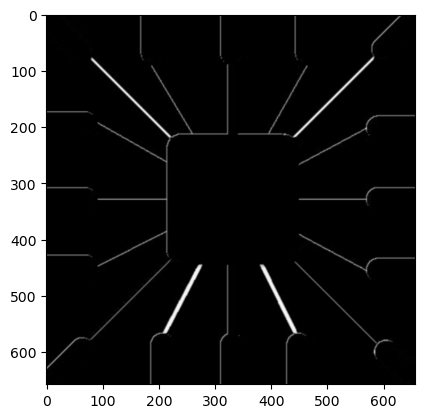

In [13]:
# 礼帽
test = cv2.imread('test.png')
tophat = cv2.morphologyEx(test, cv2.MORPH_TOPHAT,kernel)

plt.imshow(tophat)

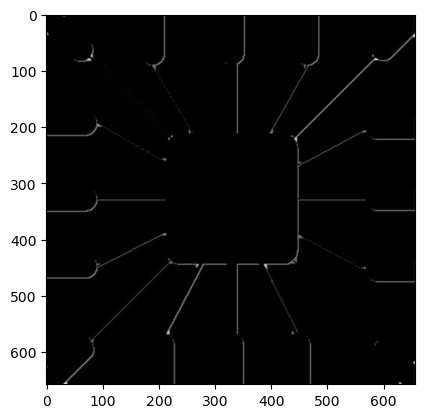

In [14]:
# 黑帽
test = cv2.imread('test.png')
blackhat = cv2.morphologyEx(test, cv2.MORPH_BLACKHAT,kernel)

plt.imshow(blackhat)

## 图像梯度-sobel算子

dst = cv2.Sobel(src,ddepth,dx,dy,ksize)

* ddepth:图像的深度
* dx和dy分别表示水平和竖直方向
* ksize是Sobel算子的大小

In [13]:
img = cv2.imread('test.png')


In [14]:
def cv_show(img,name):
    cv2.imshow(name,img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


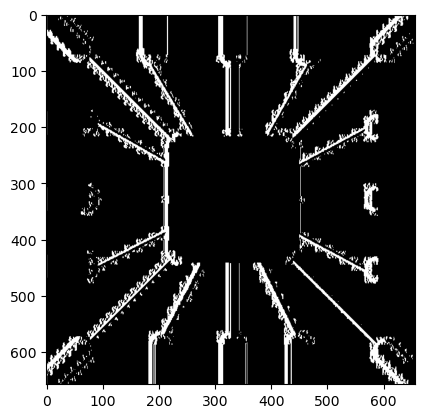

In [18]:
sobelx = cv2.Sobel(img, cv2.CV_64F,1,0,ksize=3)
plt.imshow(sobelx)

白到黑是正数，黑到白就是负数了，所有的负数会被截断成0，所以要取绝对值

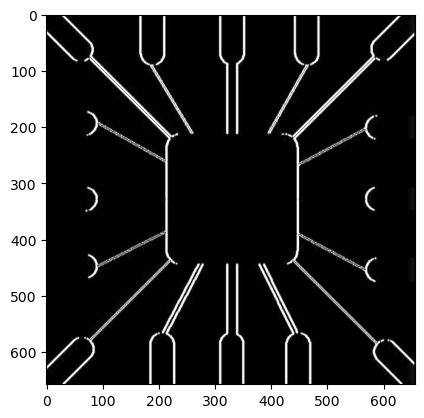

In [32]:
sobelx = cv2.Sobel(img, cv2.CV_64F,1,0,ksize=3)
#取绝对值值：
sobelx = cv2.convertScaleAbs(sobelx)
plt.imshow(sobelx)
# cv_show(sobelx,'sobelx')

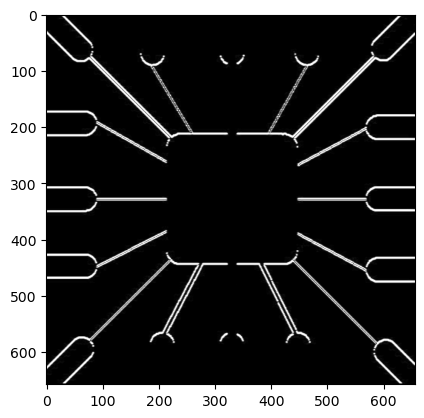

In [35]:
sobely = cv2.Sobel(img, cv2.CV_64F,0,1,ksize=3)
#取绝对值值：
sobely = cv2.convertScaleAbs(sobely)
plt.imshow(sobely)
# cv_show(sobelxy,'sobelxy')

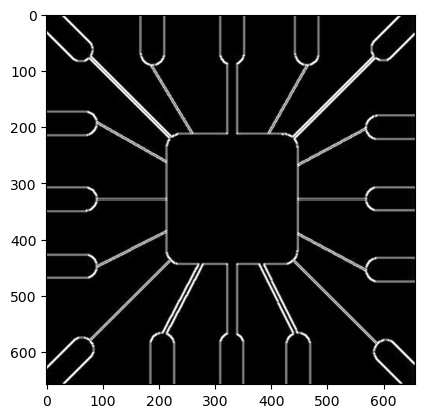

In [36]:
sobelxy = cv2.addWeighted(sobelx, 0.5, sobely, 0.5, 0)
sobelxy = cv2.convertScaleAbs(sobelxy)
plt.imshow(sobelxy)

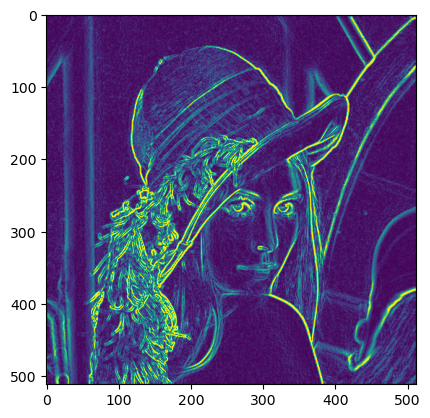

In [24]:
#x和y分别进行sobel计算,再求和(推荐)
def sobelxy(image,module=None):
    test = cv2.imread(image,module)
    sobelx = cv2.Sobel(test, cv2.CV_64F,1,0,ksize=3)
    sobelx = cv2.convertScaleAbs(sobelx)
    sobely = cv2.Sobel(test, cv2.CV_64F,0,1,ksize=3)
    sobely = cv2.convertScaleAbs(sobely)
    sobelxy = cv2.addWeighted(sobelx, 0.9, sobely, 0.9, 0)
    plt.imshow(sobelxy) 
sobelxy('lena.png', cv2.IMREAD_GRAYSCALE)

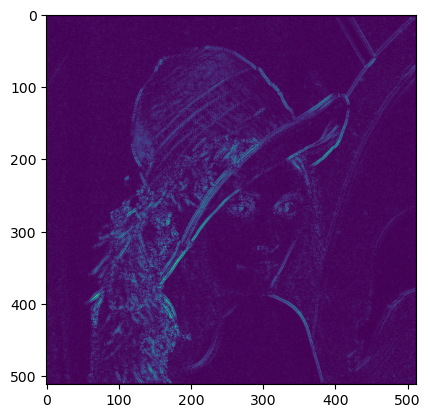

In [53]:
# 不建议直接计算(效果不是很好,模糊，重影)
def sobelxy_dir(image,module=None):
    test = cv2.imread(image,module)
    sobelxy = cv2.Sobel(test, cv2.CV_64F,1,1,ksize=3)
    sobelxy = cv2.convertScaleAbs(sobelxy)
    plt.imshow(sobelxy)
sobelxy_dir('lena.png',cv2.IMREAD_GRAYSCALE)

## 图像平滑

In [59]:
test = cv2.imread('lena_noise.png') 
cv2.imshow('lena',test)
cv2.waitKey(0)
cv2.destroyAllWindows()

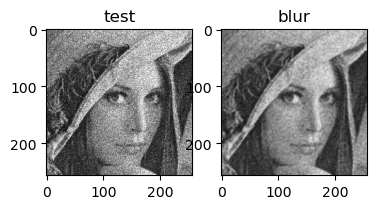

In [64]:
#均值滤波
# 简单的平均卷积操作
test = cv2.imread('lena_noise.png')
blur = cv2.blur(test,(3,3))

plt.subplot(231), plt.imshow(test, 'gray'), plt.title('test')
plt.subplot(232), plt.imshow(blur, 'gray'), plt.title('blur')

cv2.waitKey(0)
cv2.destroyAllWindows()

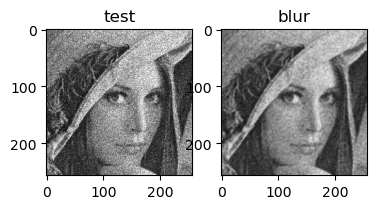

In [67]:
# 方框滤波
# 基本和均值滤波一样，可以选择归一化
test = cv2.imread('lena_noise.png')
box = cv2.boxFilter(test,-1,(3,3),normalize=True)

plt.subplot(231), plt.imshow(test, 'gray'), plt.title('test')
plt.subplot(232), plt.imshow(box, 'gray'), plt.title('blur')

cv2.waitKey(0)
cv2.destroyAllWindows()

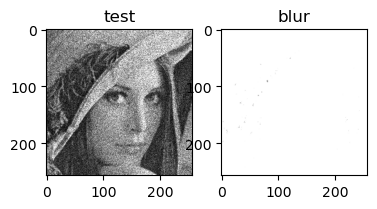

In [74]:
#方框滤波
# 基本和均值滤波一样，可以选择归一化，容易越界
test = cv2.imread('lena_noise.png')
box_F = cv2.boxFilter(test,-1,(3,3),normalize=False)

plt.subplot(231), plt.imshow(test, 'gray'), plt.title('test')
plt.subplot(232), plt.imshow(box_F, 'gray'), plt.title('blur')

cv2.waitKey(0)
cv2.destroyAllWindows()

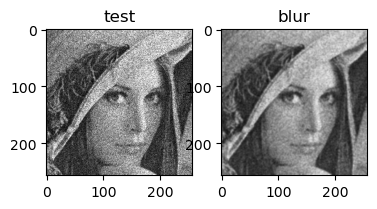

In [71]:
#高斯滤波
#高斯模糊的卷积核里的数值是满足高斯分别，相当于更重视中间的
test = cv2.imread('lena_noise.png')
gussian = cv2.GaussianBlur(test,(5,5), 1)

plt.subplot(231), plt.imshow(test, 'gray'), plt.title('test')
plt.subplot(232), plt.imshow(gussian, 'gray'), plt.title('blur')

cv2.waitKey(0)
cv2.destroyAllWindows()

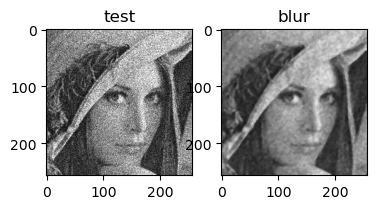

In [73]:
#中值滤波
# 简单的均值类的操作
test = cv2.imread('lena_noise.png')
median = cv2.medianBlur(test,5)

plt.subplot(231), plt.imshow(test, 'gray'), plt.title('test')
plt.subplot(232), plt.imshow(median, 'gray'), plt.title('blur')

cv2.waitKey(0)
cv2.destroyAllWindows()

In [77]:
res = np.hstack((test,blur,gussian,median))
cv2.imshow('res',res)
cv2.waitKey(0)
cv2.destroyAllWindows()

## 阈值处理

retval , dst=cv2.threshold( src, thresh, maxval, type)

retval代表返回的阈值。

dst代表阈值分割结果图像，与原始图像具有相同的大小和类型。

src代表要进行阈值分割的图像，可以是多通道的，8位或32位浮点型数值。

thresh代表要设定的阈值。

maxval代表当type参数为THRESH_BINARY或者THRESH_BINARY_INV类型时，需要设定的最大值。

type代表阈值分割的类型，具体类型值如下列。


* cv.THRESH_BINARY 超过阈值部分取maxval(最大值),否则取0
* cv.THRESH_BINARY_INV THRESH_BINARY的反转
* cv.THRESH_TRUNC 大于阈值部分设为阈值,否则不变
* cv.THRESH_TOZERO 大于阈值部分不变,否则设为0
* cv.THRESH_TOZERO_INV 大于阈值部分不变,否则设为0

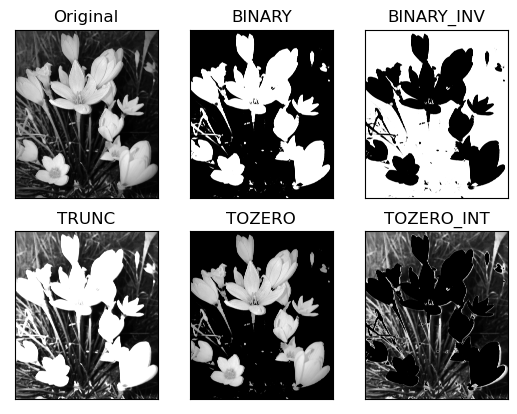

In [78]:
img_gray = cv2.imread("flower.jpg",cv2.IMREAD_GRAYSCALE)
ret, thresh1 = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY_INV)
ret, thresh3 = cv2.threshold(img_gray, 127, 255, cv2.THRESH_TRUNC)
ret, thresh4 = cv2.threshold(img_gray, 127, 255, cv2.THRESH_TOZERO)
ret, thresh5 = cv2.threshold(img_gray, 127, 255, cv2.THRESH_TOZERO_INV)

titles = ['Original', "BINARY", "BINARY_INV", "TRUNC", "TOZERO", "TOZERO_INT"]
images = [img_gray, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

## Canny边缘检测

1. 

In [7]:
img = cv2.imread("wn.jpg",cv2.IMREAD_GRAYSCALE)

v1= cv2.Canny(img,90,160)
v2 = cv2.Canny(img,50,100)
res = np.hstack((v1,v2))
cv2.imshow('res',res)
cv2.waitKey(0)
cv2.destroyAllWindows()

## 图像轮廓

cv2.findContours(img,mode,method)
mode:轮廓检测模式

* 

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


In [3]:
def resize(img, divsize):
    height, width = img.shape[:2]
    img = cv2.resize(img, (int(width/divsize), int(height/divsize)))
    return img

In [4]:
def cv_show(img):
    cv2.imshow('image',img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

为了更高的准确率，实用二值图像

In [9]:
img = cv2.imread("wn.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 125, 255, cv2.THRESH_BINARY)
cv_show(thresh)
# cv2.imwrite("sch.jpg",thresh)

In [11]:
contours, hierarchy =cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)

In [12]:

res = cv2.drawContours(img.copy(), contours, -1, (255, 0, 0), 2)
#template_thresh 是经过预处理的二值图像
cv_show(res)

轮廓近似

In [19]:
cnt = contours[0]
epsilon = 0.15 * cv2.arcLength(cnt, True)
approx = cv2.approxPolyDP(cnt, epsilon, True)
res = cv2.drawContours(img.copy(), [approx], -1, (0, 0, 255), 2)
cv_show(res)

外接矩形

In [21]:
cnt = contours[1]
x, y, w, h = cv2.boundingRect(cnt)
res = cv2.rectangle(img.copy(), (x, y), (x + w, y + h), (0, 255, 0), 2)
cv_show(res)

## 模板匹配

模板匹配和卷积原理很像，在模板原图像上从原点开始滑动，计算模板与（图像被模板覆盖的地方）的差别程度，这个差别程度的计算方法在opencv里有6钟，然后将每次计算的结果放入一个矩形里，作为结果输出。假如原图形是AxB大小，而模板是axb大小，则输出结果的矩形是（A-a+1）x（B-b+1）

In [27]:
img = cv2.imread('lena.png', 0)
template = cv2.imread('lena_noise.png', 0)
template = cv2.GaussianBlur(template,(5,5), 1)
h, w = template.shape[:2]

In [28]:
img.shape

(512, 512)

In [29]:
template.shape

(257, 257)

* TM_CCOEFF：计算平方不同，计算出来的值越小，越相关
* TM_CCOEFF_NORMED：计算相关性，计算出来的值越大，越相关
* TM_CCORR：计算相关系数，计算出来的值越大，越相关
* TM_CCORR_NORMED：计算归一化平方不同，计算出来的值越接近0，越相关
* TM_SQDIFF：计算归一化相关性，计算出来的值越接近1，越相关
* TM_SQDIFF_NORMED：计算归一化相关系数，计算出来的值越接近1，越相关

公式：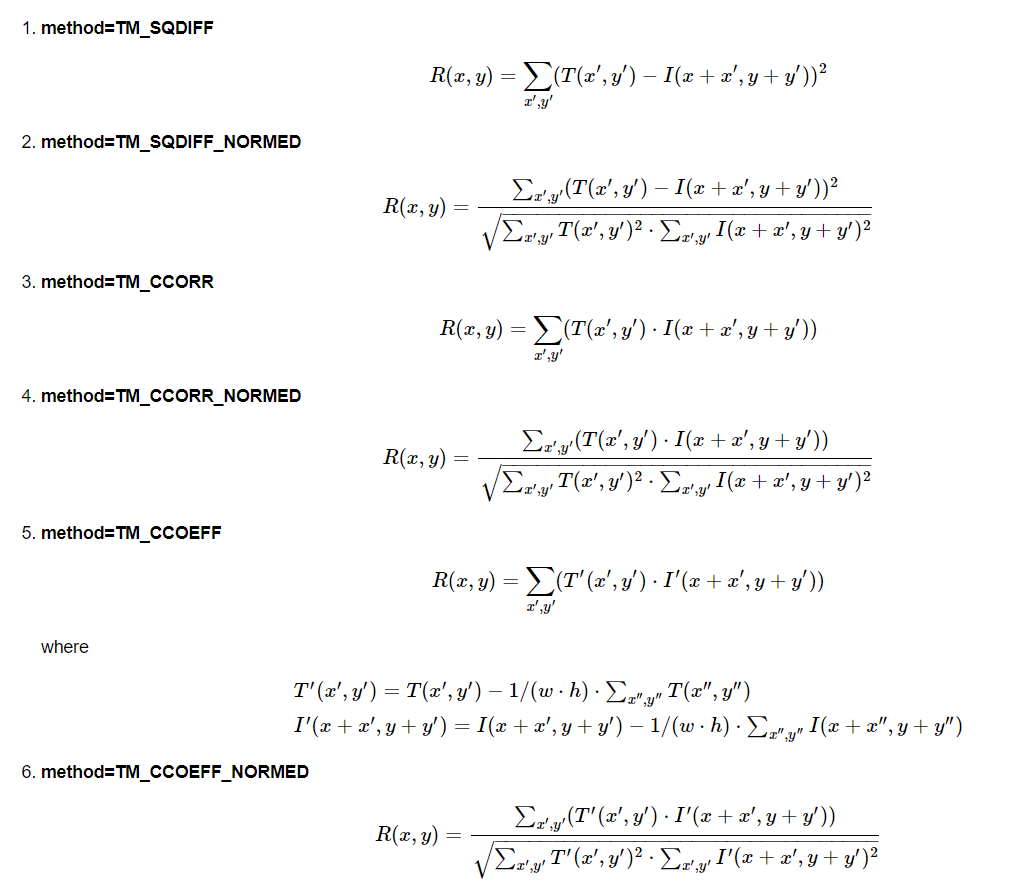

In [30]:
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
          'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

In [31]:
res = cv2.matchTemplate(img, template, cv2.TM_SQDIFF)
res.shape

(256, 256)

In [32]:
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

In [33]:
min_val

14145854.0

In [34]:
max_val

478312704.0

In [35]:
min_loc

(144, 146)

In [36]:
max_loc

(255, 55)

4


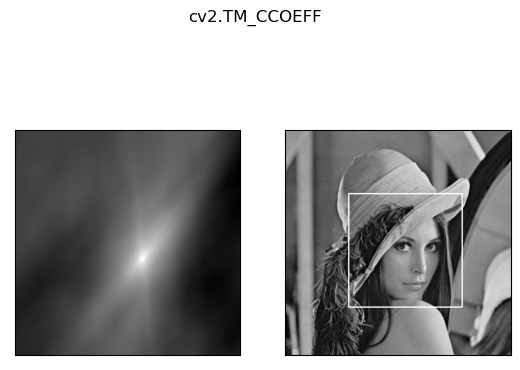

5


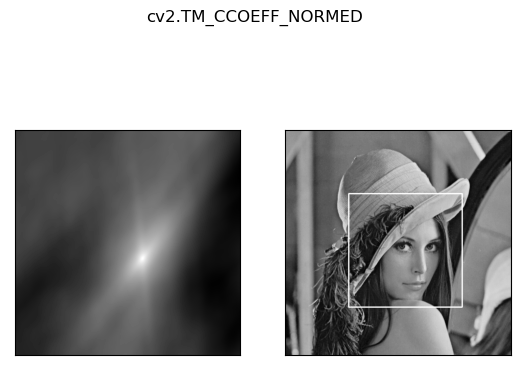

2


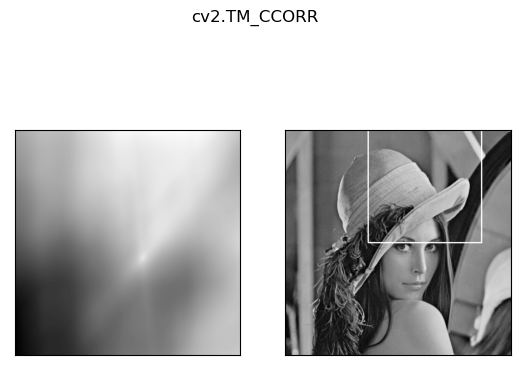

3


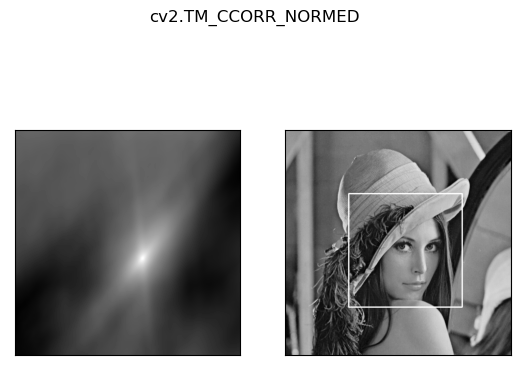

0


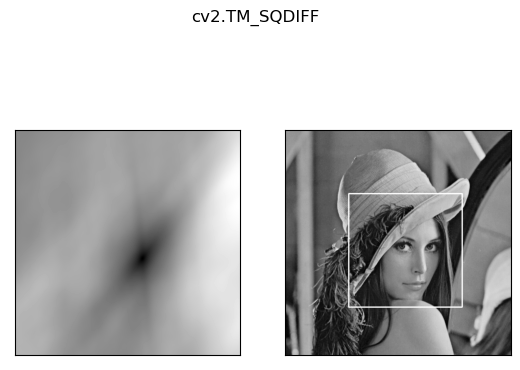

1


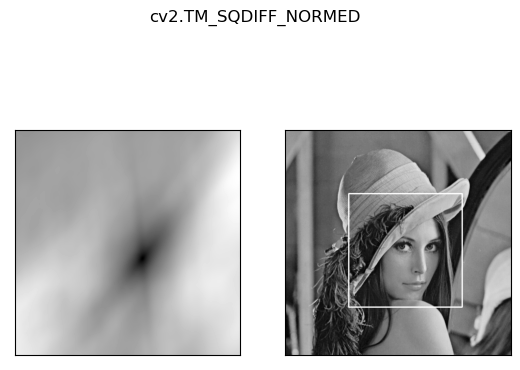

In [37]:
for meth in methods:
    img2 = img.copy()
    
    method = eval(meth)
    print(method)
    res = cv2.matchTemplate(img, template, method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    
    # 在原图中画一个匹配到模板的矩形
    cv2.rectangle(img2, top_left, bottom_right, 255, 2)
    
    plt.subplot(121), plt.imshow(res, cmap='gray')
    plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(img2, cmap='gray')
    plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    plt.show()
        

#### 匹配多个对象

In [ ]:
img_rgb = cv2.imread('')
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
template = cv2.imread('', 0)
h, w = template.shape[:2]

res = cv2.matchTemplate(img_gray, template, cv2.TM_CCOEFF_NORMED)
threshold = 0.8

loc = np.where(res >= threshold)
for pt in zip(*loc[::-1]):
    bottom_right = (pt[0] + w, pt[1] + h)
    cv2.rectangle(img_rgb, pt, bottom_right, (0,0,244), 2)
    
cv2.imshow('img_rgb', img_rgb)
cv2.waitKey(0)

## 图像金字塔

* 高斯金字塔
* 拉普拉斯金字塔


In [53]:
img = cv2.imread('lena_noise.png')
# img = cv2.GaussianBlur(img,(3,3), 1)
cv_show(img)
print(img.shape)

(257, 257, 3)


In [54]:
up = cv2.pyrUp(img)
cv_show(up)
print(up.shape)

(514, 514, 3)


In [55]:
down = cv2.pyrDown(img)
cv_show(down)
print(down.shape)

(129, 129, 3)


In [57]:
up = cv2.pyrUp(img)
up_down = cv2.pyrDown(up)
down = cv2.pyrDown(img)
down_up = cv2.pyrUp(down)
res = np.hstack((img, up_down, down_up))
cv_show(res)

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 257 and the array at index 2 has size 258